# 소상공인 시장진흥공단 상가(상권)정보 201912 기준

* https://www.data.go.kr/dataset/15012005/fileData.do

In [10]:
%ls "./data/franchise"

 D 드라이브의 볼륨: Data
 볼륨 일련 번호: D818-A4B8

 d:\lec\04.python\data\franchise 디렉터리

2023-11-08  오전 09:55    <DIR>          .
2023-11-08  오전 09:55    <DIR>          ..
2023-11-08  오전 09:47       264,920,940 상가업소정보_201912_01.csv
2023-11-08  오전 09:47       318,748,011 소상공인시장진흥공단_상가업소정보_201812_4.csv
2023-11-08  오전 09:47               589 소상공인시장진흥공단_전국 카페업소 수(2015년12월_2019년9월).csv
               3개 파일         583,669,540 바이트
               2개 디렉터리  782,081,454,080 바이트 남음


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 한글처리
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False

In [7]:
!pip install plotnine
!pip install folium
!pip show plotnine
!pip show folium

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 1.4 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.3 MB 5.9 MB/s eta 0:00:01
   ---------------------------- ----------- 0.9/1.3 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 8.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/73.7 kB ? eta -:--:--
   ---------------------------------------- 73.7/73.7 kB 4.2 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/100.3 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.3 kB ? eta -:--:--
   ----------- --------------------------- 30.7/100.3 kB 640.0 kB/s eta 0:00:01
   ---------------------

In [8]:
# 데이터시각화 r의 ggplot2
from plotnine import * # 시각화패키지
import folium          # 지도표현가능 패키지
import re

In [11]:
# 상가업소정보_201912_01.csv
shop = pd.read_csv('./data/franchise/상가업소정보_201912_01.csv', encoding='utf-8'
                   , delimiter='|', engine='python')
display(shop.head())
display(shop.shape)
display(shop.info())

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


(573680, 39)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

None

In [16]:
# 실습01. 상권업종소분류명에 '커피'가 포함된 자료만 추출
# str.match(), str.contains()
coffee = shop[shop.상권업종소분류명.str.contains('커피')]
print(coffee.shape)
print(coffee.columns)

(23488, 39)
Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')


In [20]:
# 실습02. 상호명으로 몇 건의 커피점이 있는가?
# unique()
coffee.상호명.unique().shape

(15438,)

In [25]:
# 실습03. 상호명에 '스타벅스'가 포함된 상가의 건수?
coffee.loc[coffee.상호명.str.contains('스타벅스'), '상호명'].unique().shape

(230,)

In [31]:
# 실습04. '시도명'의 결측치확인 (실습자료는 서울과 부산지역만 있다.)
# 결측의 건수와 시도별 데이터건수를 출력
# isnull(), sum(), value_counts()
print(f'시도명 자료에 결측치의 건수 = {coffee.시도명.isnull().sum()}')
print(f'시도명 건수 = {coffee.시도명.value_counts()}')

시도명 자료에 결측치의 건수 = 0
시도명 건수 = 시도명
서울특별시    18608
부산광역시     4880
Name: count, dtype: int64


In [34]:
# 시군구명 확인
display(coffee['시군구명'].unique())
display(shop['시군구명'].unique())

array(['강남구', '서초구', '성북구', '영등포구', '중구', '구로구', '종로구', '도봉구', '마포구',
       '북구', '기장군', '광진구', '남구', '은평구', '서대문구', '양천구', '용산구', '해운대구',
       '관악구', '성동구', '송파구', '사상구', '금천구', '동대문구', '사하구', '강서구', '금정구',
       '동작구', '중랑구', '강북구', '강동구', '수영구', '연제구', '노원구', '부산진구', '동구',
       '동래구', '영도구', '서구'], dtype=object)

array(['강남구', '금천구', '사상구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구',
       '구로구', '영등포구', '서대문구', '동대문구', '노원구', '동래구', '부산진구', '동작구', '수영구',
       '동구', '성동구', '영도구', '관악구', '강동구', '양천구', '종로구', '해운대구', '금정구',
       '연제구', '강북구', '은평구', '기장군', '중랑구', '도봉구', '마포구', '사하구', '서구',
       '용산구', '북구', '남구'], dtype=object)

In [37]:
# 상권업종중분류명
display(coffee['상권업종중분류명'].unique())
display(coffee['상권업종중분류명'].value_counts())
print()

display(shop['상권업종중분류명'].unique())
display(shop.상권업종중분류명.value_counts())

array(['커피점/카페'], dtype=object)

상권업종중분류명
커피점/카페    23488
Name: count, dtype: int64

array(['유흥주점', '커피점/카페', '패스트푸드', '대중목욕탕/휴게', '일식/수산물', '분식', '한식',
       '음/식료품소매', '건강/미용식품', '선물/팬시/기념품', '양식', '중식', '종합소매점', '병원',
       '화장품소매', '학원-어학', '의복의류', 'PC/오락/당구/볼링등', '별식/퓨전요리', '학원-자격/국가고시',
       '도서관/독서실', '가정/주방/인테리어', '학원-음악미술무용', '무도/유흥/가무', '이/미용/건강',
       '사진/광학/정밀기기소매', '세탁/가사서비스', '닭/오리요리', '책/서적/도서', '예식/의례/관혼상제',
       '광고/인쇄', '학원-예능취미체육', '운송/배달/택배', '기타음식업', '부동산중개', '주유소/충전소',
       '철물/난방/건설자재소매', '유아교육', '주택수리', '사무/문구/컴퓨터', '약국/한약방', '물품기기대여',
       '자동차/이륜차', '자동차/자동차용품', '가구소매', '개인/가정용품수리', '학원-보습교습입시', '기타판매업',
       '유사의료업', '학원기타', '개인서비스', '시계/귀금속소매', '사진', '요가/단전/마사지', '학문교육기타',
       '가방/신발/액세서리', '대행업', '페인트/유리제품소매', '중고품소매/교환', '인력/고용/용역알선',
       '애견/애완/동물', '음식배달서비스', '가전제품소매', '유아용품', '학원-컴퓨터', '기타서비스업',
       '운동/경기용품소매', '장례/묘지', '법무세무회계', '취미/오락관련소매', '연극/영화/극장',
       '평가/개발/관리', '수의업', '호텔/콘도', '모텔/여관/여인숙', '분양', '제과제빵떡케익',
       '학원-창업취업취미', '의약/의료품소매', '행사/이벤트', '경마/경륜/성인오락', '예술품/골동품/수석/분재',
       '부페', '의료관련서비스업'

상권업종중분류명
한식          59725
이/미용/건강     44822
종합소매점       36098
의복의류        32956
유흥주점        24017
            ...  
스포츠/운동         54
운영관리시설         25
유스호스텔          18
실외운동시설         16
부동산관련서비스        5
Name: count, Length: 94, dtype: int64

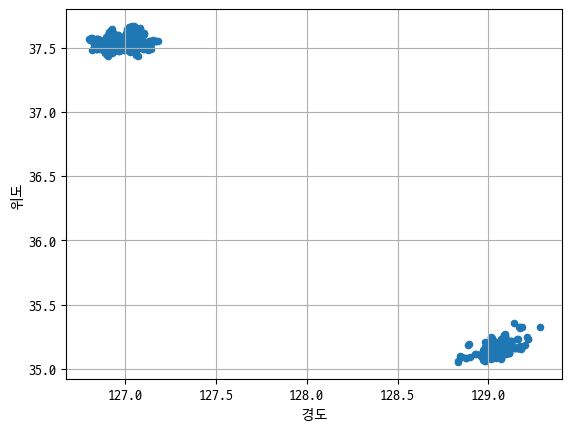

In [40]:
# 실습05. 시각화(scatter), shop에서 1000건자료를 선택해서 시각화하기
# 1) DataFrame.plot()
shop[:1000].plot.scatter(x='경도', y='위도', grid=True)
plt.show()

###### ggplot
<img src="./images/26.데이터분석_실습01.전국도시공원_01_ggplot_cheatsheet.PNG">
<img src="./images/26.데이터분석_실습01.전국도시공원_02_ggplot_cheatsheet.PNG">

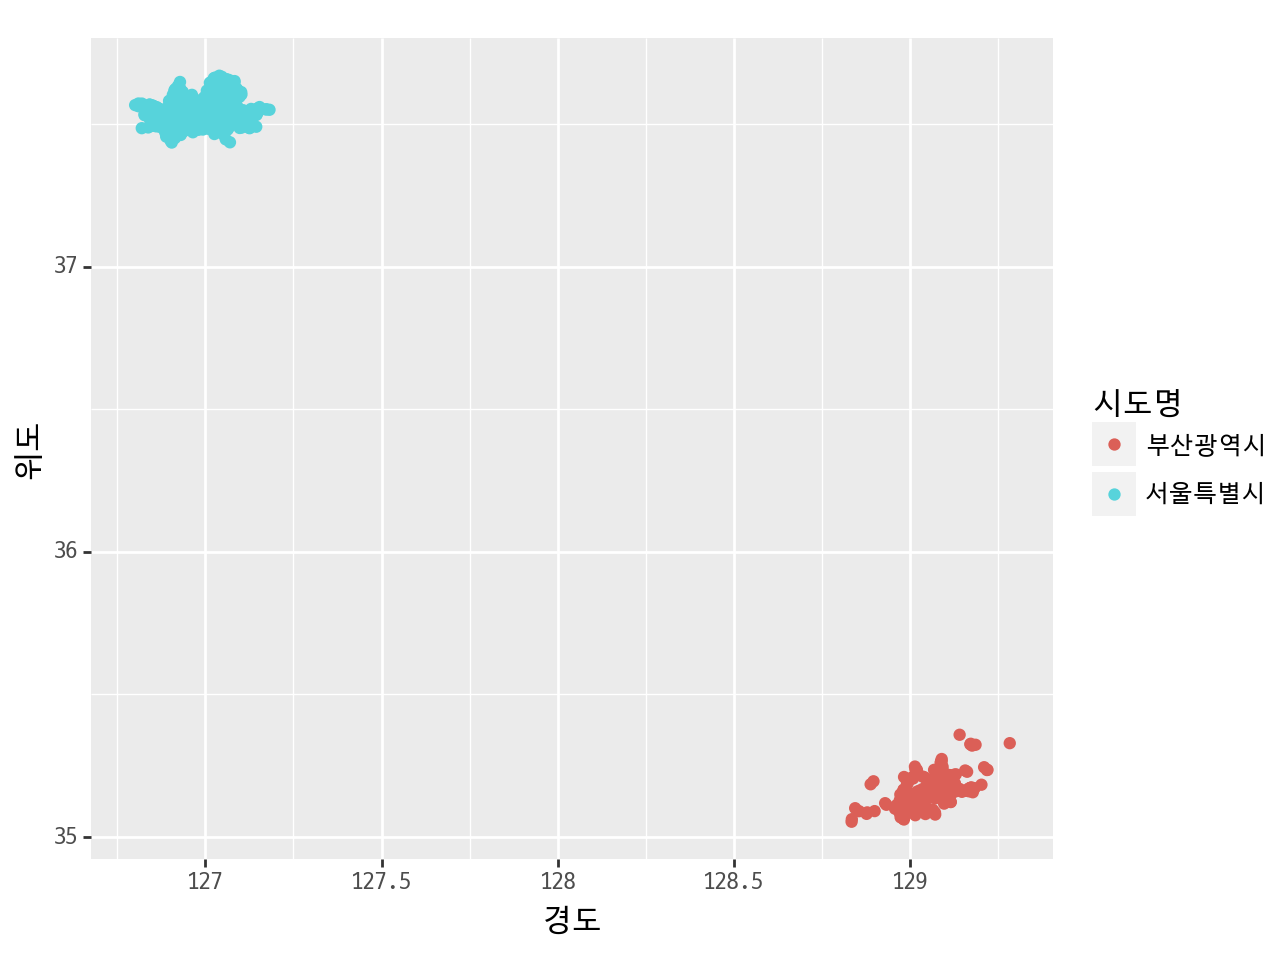

<Figure Size: (640 x 480)>

In [51]:
# 2) ggplot
(ggplot(shop[:1000])
 + aes(x='경도', y='위도', color='시도명')
 + geom_point()
 + theme(text=element_text(family='D2Coding'))
)

In [97]:
# 3) folium으로 시각화
shop_df = shop[:1000]

lng = shop_df.위도.mean()
lat = shop_df.경도.mean()
print(lng, lat)

m = folium.Map(location=[lng, lat], zoom_start=7)

for n in shop_df.index:
    shop_name = shop_df.loc[n, '상호명'] + '-' + shop_df.loc[n, '도로명주소']
    # print(shop_name)
    icon_color = 'blue'
    folium.CircleMarker(
        location=[shop_df.loc[n, '위도'], shop_df.loc[n, '경도']],
        radius = 10,
        popup = shop_name,
        color = icon_color,
        fill = True,
        fill_color = 'green',
        fill_opacity = 0.6,
        tooltip = 'Hello Folium!!!'
    ).add_to(m)
m

36.81962669680732 127.62624275158558


In [98]:
# 실습07. 서울자료만 추출, 건수와 결측치건수 출력하기
# 시도명이 포함 contains(), 서울로 시작 startswith(), copy()
df_seoul = shop.loc[shop.시도명.str.startswith('서울')].copy()
print(df_seoul.shape)
print(df_seoul.isnull().sum())

(407376, 39)
상가업소번호            0
상호명               0
지점명          349773
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      24726
표준산업분류명       24726
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         77159
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        359537
건물관리번호            0
건물명          208611
도로명주소             0
구우편번호             0
신우편번호             2
동정보          375585
층정보          129767
호정보          348313
경도                0
위도                0
dtype: int64


In [104]:
# 서울지역의 기초통계정보
display(df_seoul.describe()) # 수치자료만 통계치 출력

# 수치와 객체(문자열)포함한 통계치 include=np.object_옵션 설정
display(df_seoul.describe(include=np.object_))

# 특정컬럼에 대한 기초통계정보
display(df_seoul[['위도', '경도']].describe(include=np.number))

,상가업소번호,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,지번부번지,도로명코드,건물본번지,건물부번지,구우편번호,신우편번호,경도,위도
count,4.073760e+05,407376.0,407376.000000,4.073760e+05,4.073760e+05,4.073760e+05,407376.000000,407376.000000,330217.000000,4.073760e+05,407376.000000,47839.000000,407376.000000,407374.000000,407376.000000,407376.000000
mean,2.044920e+07,11.0,11442.863055,1.144348e+09,1.144297e+09,1.144299e+18,1.000906,410.067994,35.079875,1.144322e+11,154.607058,7.600640,136317.870034,5180.542749,126.996900,37.544853
std,5.305169e+06,0.0,200.617052,2.006030e+07,2.006098e+07,2.006119e+16,0.030083,413.743103,108.388772,2.006166e+09,281.216344,9.962542,14219.453712,2099.032557,0.080651,0.048091
min,2.890524e+06,11.0,11110.000000,1.111052e+09,1.111010e+09,1.111010e+18,1.000000,1.000000,1.000000,1.111020e+11,0.000000,1.000000,100011.000000,1000.000000,126.768169,37.434081
25%,1.603173e+07,11.0,11260.000000,1.126052e+09,1.126010e+09,1.126010e+18,1.000000,89.000000,4.000000,1.126030e+11,20.000000,1.000000,131200.000000,3423.000000,126.927946,37.505315
50%,2.226978e+07,11.0,11470.000000,1.147051e+09,1.147010e+09,1.147010e+18,1.000000,289.000000,10.000000,1.147031e+11,51.000000,4.000000,136815.000000,5251.000000,127.012700,37.541061
75%,2.491185e+07,11.0,11650.000000,1.165053e+09,1.165010e+09,1.165010e+18,1.000000,636.000000,27.000000,1.165031e+11,181.000000,10.000000,143849.000000,6720.000000,127.057263,37.571834
max,2.852486e+07,11.0,11740.000000,1.174070e+09,1.174011e+09,1.174070e+18,2.000000,9999.000000,9992.000000,1.174042e+11,3318.000000,250.000000,158885.000000,8866.000000,127.182588,37.692398


,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,동정보,층정보,호정보
count,407376,57603,407376,407376,407376,407376,407376,407376,382650,382650,...,407376,407376,407376,407376,407376,198765,407376,31791,277609,59063
unique,278706,20788,9,9,94,94,697,697,211,211,...,465,2,128702,11994,129310,26607,128427,982,140,2769
top,점프셈교실,강남점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,...,역삼동,대지,서울특별시 종로구 종로6가 262-1,서울특별시 서초구 신반포로,1111016400102700003012054,동대문종합시장,서울특별시 종로구 종로 266,1,1,1
freq,1788,500,132889,132889,41537,41537,27247,27247,51186,51186,...,12102,407007,981,3543,1013,1023,1000,5538,179169,6547


,위도,경도
count,407376.000000,407376.000000
mean,37.544853,126.996900
std,0.048091,0.080651
min,37.434081,126.768169
25%,37.505315,126.927946
50%,37.541061,127.012700
75%,37.571834,127.057263
max,37.692398,127.182588


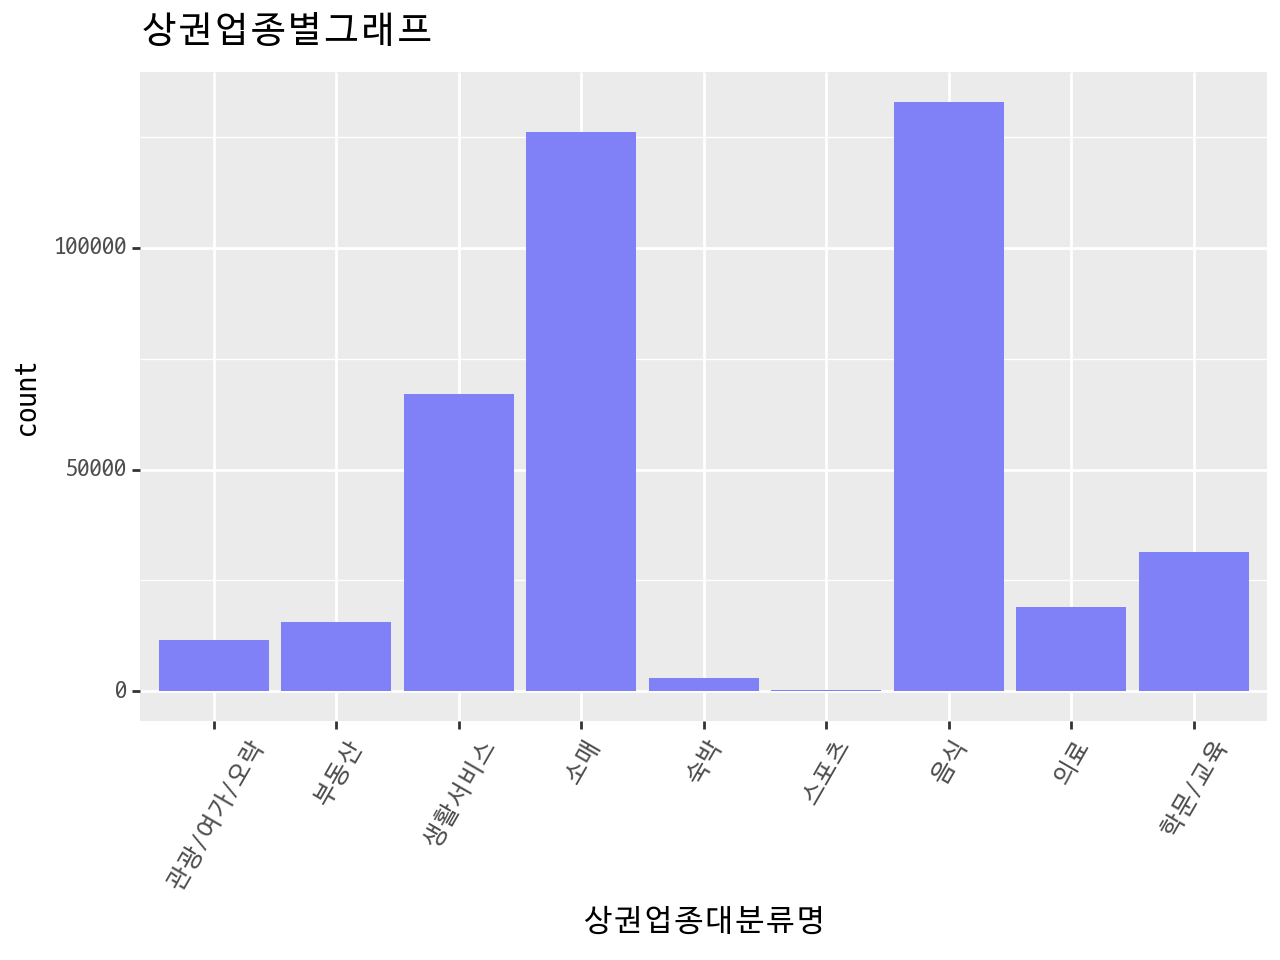

<Figure Size: (640 x 480)>

In [115]:
# 실습08. 상권업종대분류명 기준으로 바그래프그리기
(ggplot(df_seoul)
 + aes('상권업종대분류명')
 + geom_bar(fill='#8181f7')
 + ggtitle('상권업종별그래프')
 + theme(text=element_text(family='D2Coding'),
        axis_text_x=element_text(rotation=60))
)

In [139]:
# 실습 09. 상권업종대분류에서 '음식'만 추출해서 상권업종중분류명로 
# 바그래프(geom_bar) 출력하기, 수평바그래프 coord_flip()
# 1) 데이터추출
# gubun = input('상권업종 대분류명을 입력하세요 => ')
def xxx(gubun):
    df_food = df_seoul.loc[df_seoul.상권업종대분류명.str.contains(gubun)]
    df_food.head()

    # 2) 시각화
    return (ggplot(df_food)
     + aes('상권업종중분류명')
     + geom_bar(fill='#8181ff')
     + coord_flip()
     + ggtitle(f'상권업종중분류({gubun})')
     + theme(text=element_text(family='D2Coding')
             , axis_text_x=element_text(rotation=60))
    )

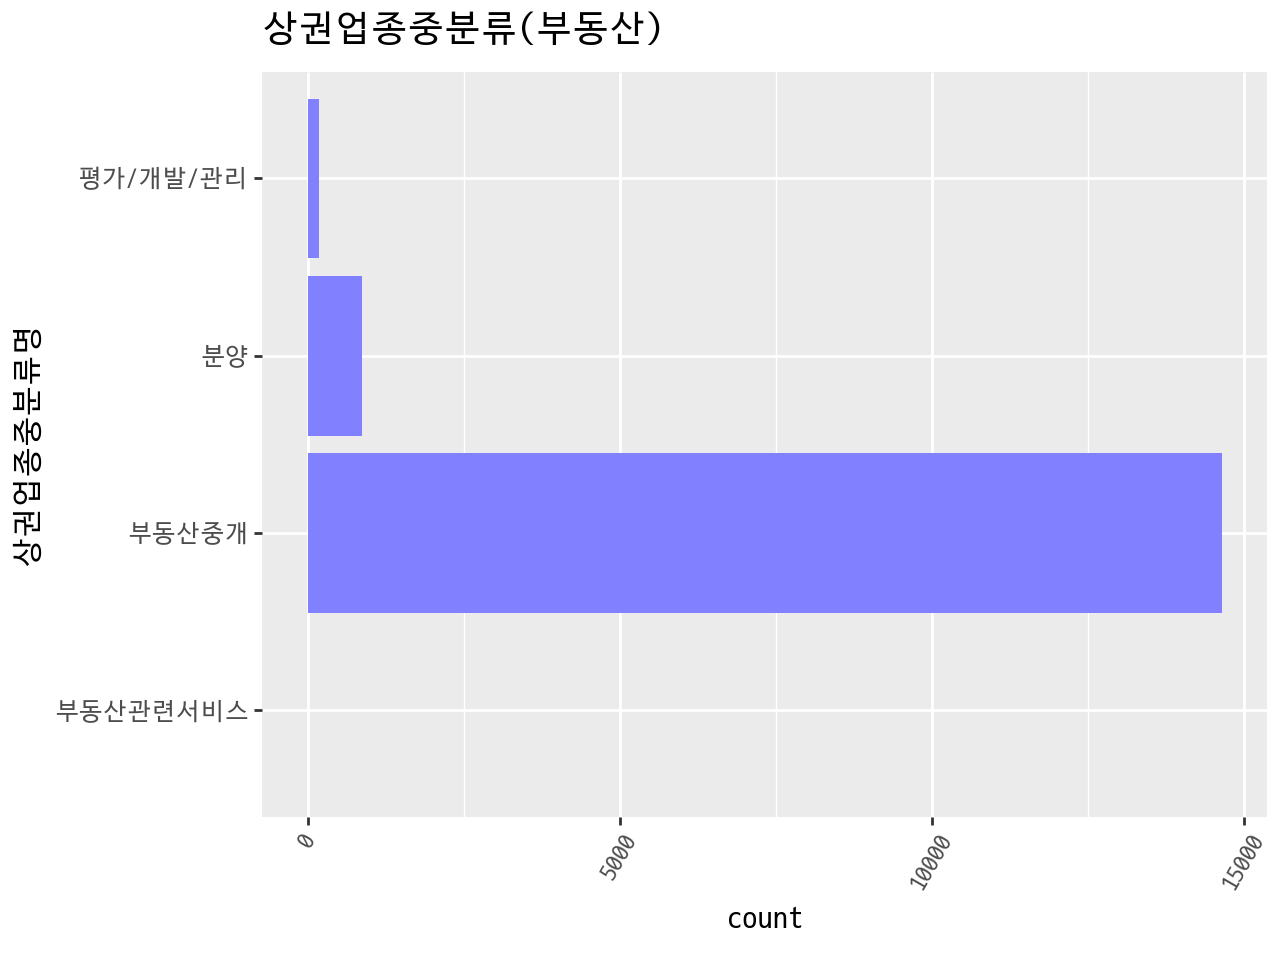

<Figure Size: (640 x 480)>

In [142]:
xxx('부동산')

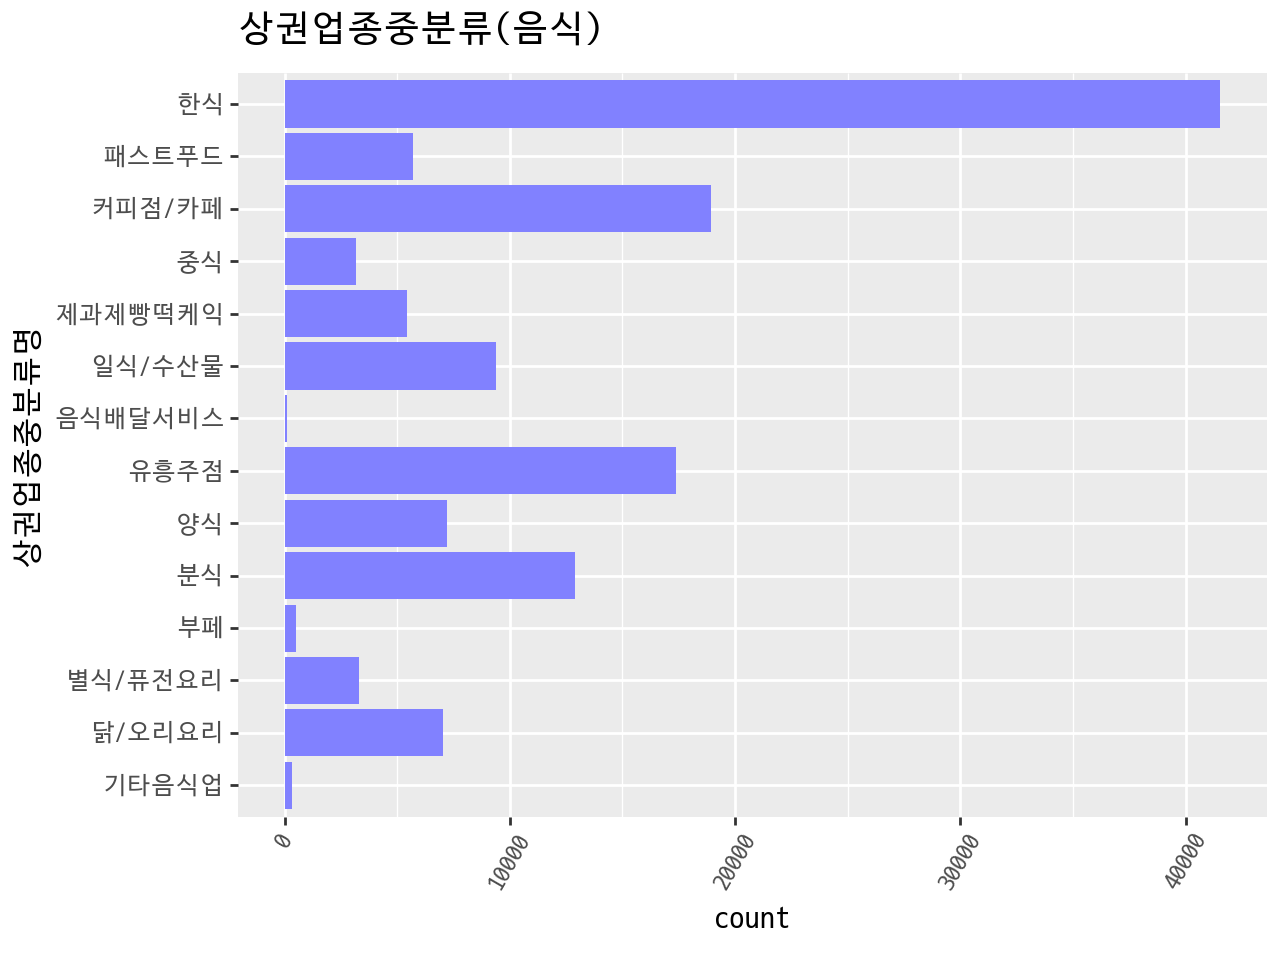

<Figure Size: (640 x 480)>

In [157]:
xxx('음식')

#### 데이터분석 (1) - 베스킨라빈스와 던킨도너츠의 상권분석

In [156]:
# 실습 10
# 1) 서울지역에서 '상호명'이 베스킨 or 던킨을 포함한 자료를 출하기
# 2) df_31 필요한 컬럼만 적용 :
#    -> '상호명', '지점명', '상권업종대분류명', '상권업종중분류명','지번주소','도로명주소', 
#       '위도', '경도','시군구명','행정동명'
# 3) 상호명의 건수

# 1) df_31
df_31 = df_seoul[df_seoul.상호명.str.contains('베스킨|던킨')].copy()
df_31.shape
df_31.tail(2)

# 2) df_31 컬럼조정
df_31 = df_31[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명'
              ,'지번주소','도로명주소', '위도', '경도','시군구명','행정동명']]
df_31.head(2)

# 3) 상호별건수
df_31.상호명.value_counts()

상호명
던킨도너츠            118
베스킨라빈스            77
던킨도넛               5
베스킨라빈스31아이스크림      2
베스킨라빈스아이스크림        2
                ... 
던킨도너츠올림픽공원점        1
던킨도너츠합정역사점         1
비알코리아던킨도너츠중        1
비알코리아던킨도너츠서여       1
던킨도너츠용산센트럴점        1
Name: count, Length: 109, dtype: int64

In [167]:
# 실습11. 브랜드명 데이터정제
# 1) 브랜드명 컬럼을 추가
df_31['브랜드명'] = ''
df_31.columns
df_31[['상호명', '브랜드명']]

# 2) 브랜드명을 베스킨라빈스와 던킨도너츠로 신규컬럼에 저장
df_31.loc[df_31.상호명.str.contains('베스킨'), '브랜드명'] = '베스킨라빈스'
df_31.loc[df_31.상호명.str.contains('던킨'), '브랜드명'] = '던킨도너츠'
df_31[['상호명', '브랜드명']]

# 3) 브랜드명건수
print(type(df_31.브랜드명.value_counts()), df_31.브랜드명.value_counts())

<class 'pandas.core.series.Series'> 브랜드명
던킨도너츠     190
베스킨라빈스    119
Name: count, dtype: int64


In [171]:
print(f'던킨도너츠의 건수 = {df_31.브랜드명.value_counts()[0]}')
print(f'베스킨라빈스의 건수 = {df_31.브랜드명.value_counts()[1]}')

# 서울에 던킨도너츠와 베스킨라빈스의 입점비율
df_ratio = df_31.브랜드명.value_counts()[0] / df_31.브랜드명.value_counts()[1]
df_ratio

# 결과분석
# 서울지역에는 베스킨라빈스보다 던킨도너츠의 매장이 1.6배이상 분포되어 있다.

던킨도너츠의 건수 = 190
베스킨라빈스의 건수 = 119


1.596638655462185

In [177]:
# 만약에 위경도의 데이터타입이 문자형수치 즉, object타입이라면 
# 수치형(float)으로 변환해야 기초통계정보를 확인 할 수 있다.
# float64를 float32로 변환
df_31.위도 = df_31.위도.astype(np.float32)
df_31.경도 = df_31.경도.astype(np.float32)
df_31.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 1167 to 569825
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       309 non-null    object 
 1   지점명       188 non-null    object 
 2   상권업종대분류명  309 non-null    object 
 3   상권업종중분류명  309 non-null    object 
 4   지번주소      309 non-null    object 
 5   도로명주소     309 non-null    object 
 6   위도        309 non-null    float32
 7   경도        309 non-null    float32
 8   시군구명      309 non-null    object 
 9   행정동명      309 non-null    object 
 10  브랜드명      309 non-null    object 
dtypes: float32(2), object(9)
memory usage: 26.6+ KB


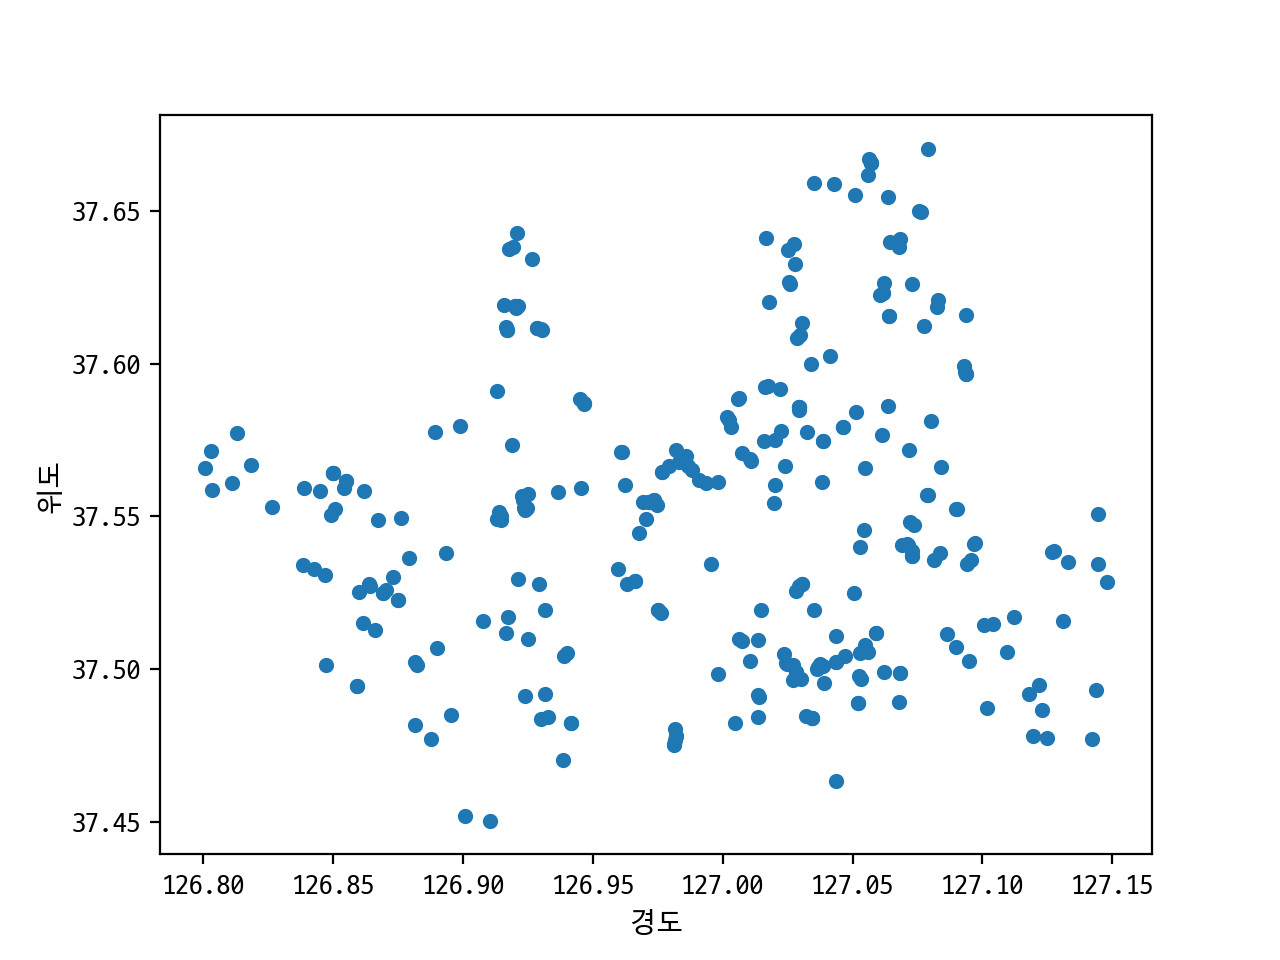

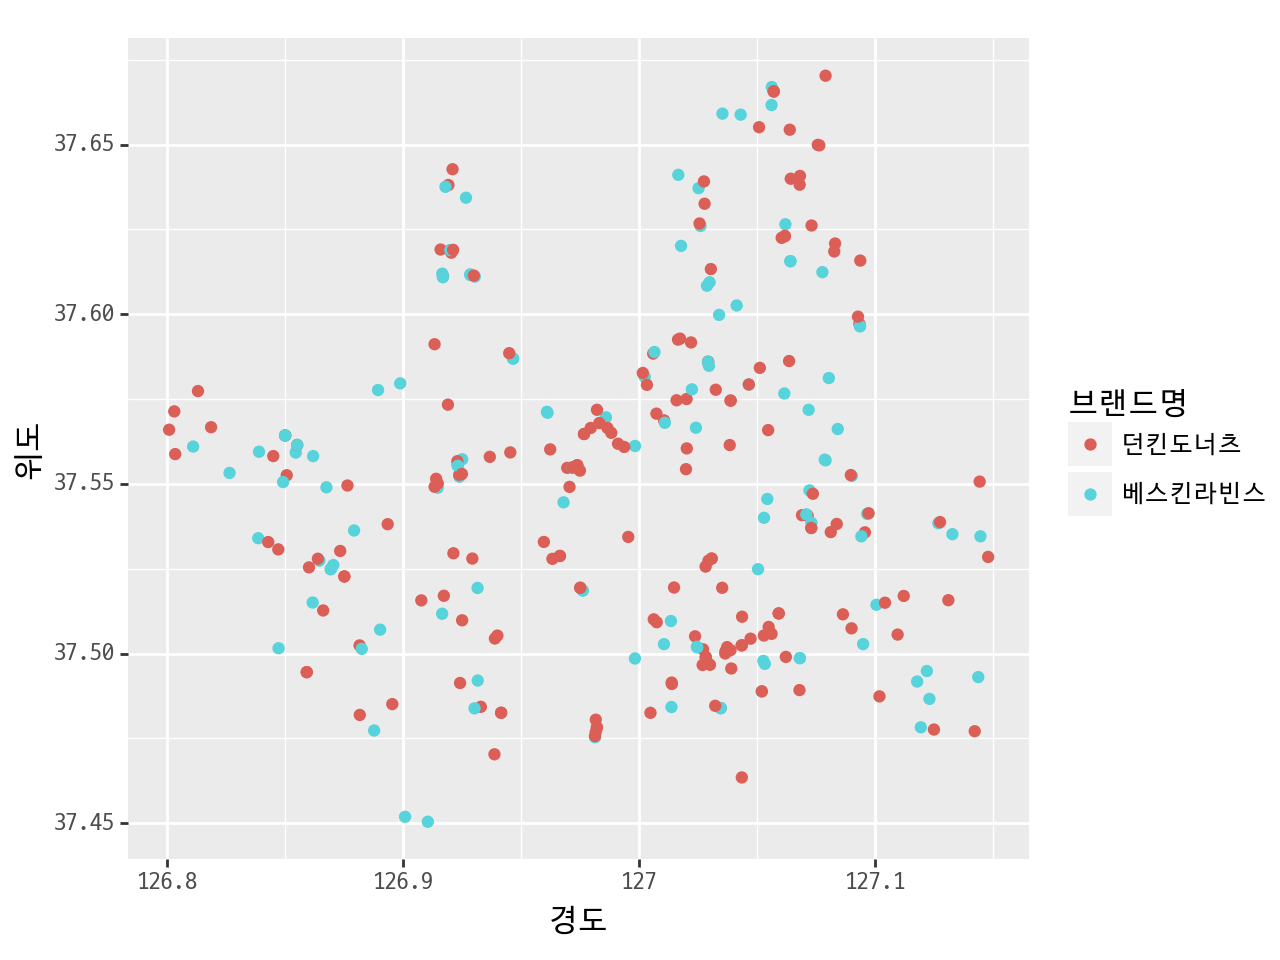

<Figure Size: (640 x 480)>

In [220]:
# 실습12. df_31 시각화(산점도)
# 1) df.plot()
df_31.plot.scatter(x='경도', y='위도')
plt.show()

# 2) ggplot()
m = (ggplot(df_31)
     + aes(x='경도', y='위도', color='브랜드명')
     + geom_point()
     + theme(text=element_text(family='D2Coding'))
     + scale_fill_gradient(low='blue', high='green')
    )
m

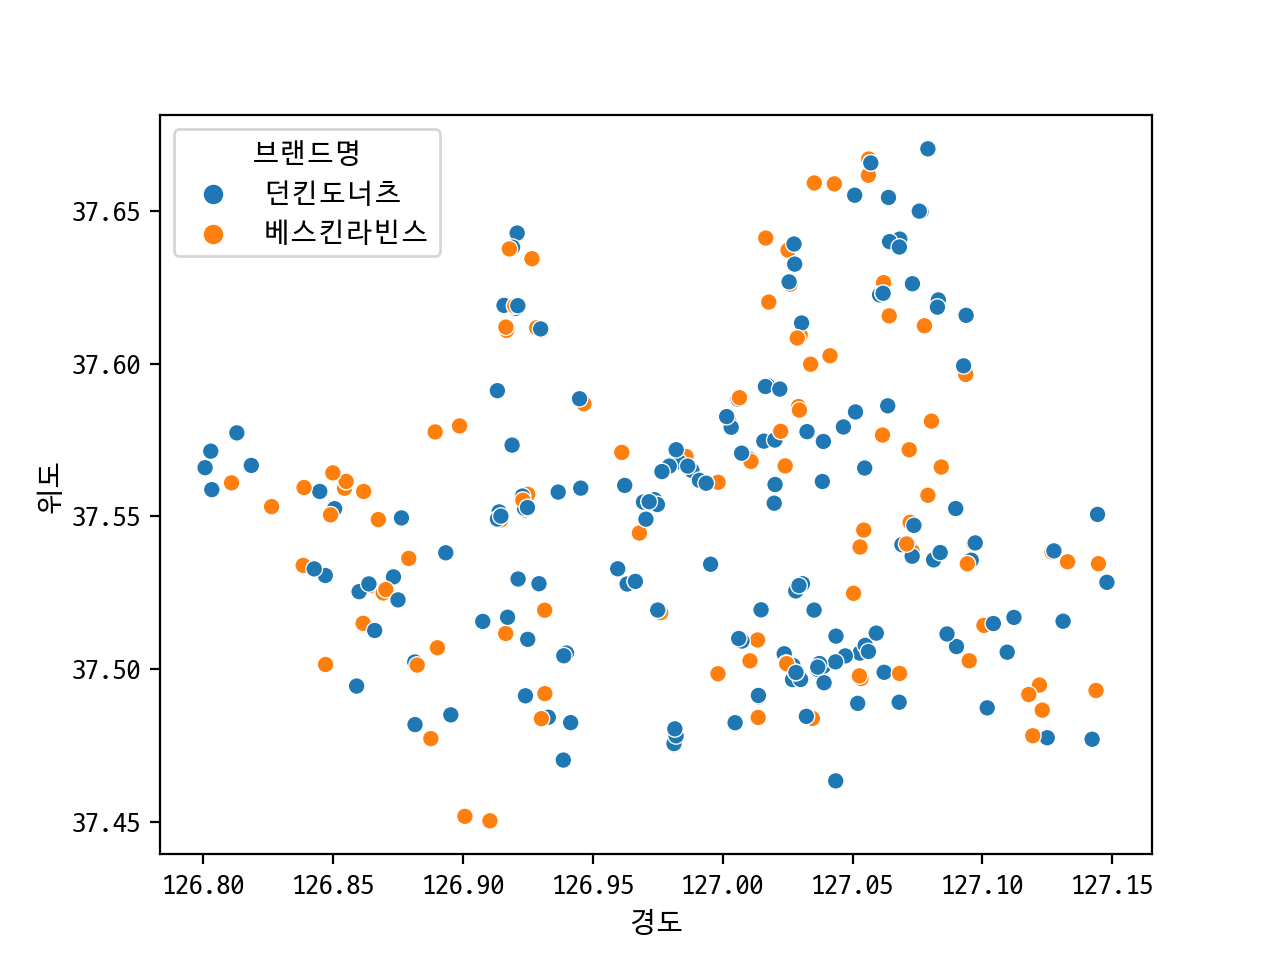

In [192]:
# 3) seaborn 패키지 - 시각화
import seaborn as sns
sns.scatterplot(data=df_31, x='경도', y='위도', hue='브랜드명')
plt.show()

In [215]:
# 4) folium을 시각화
geo_df = df_31

m = folium.Map(
    location=[geo_df.위도.mean(), geo_df.경도.mean()],
    zoom_start=12,
    # tiles="cartodb positron"
)

for i in geo_df.index:
    popup_name = geo_df.브랜드명[i] + ' / ' + geo_df.도로명주소[i]
    # popup_name = geo_df.loc[i, '브랜드명'] + ' / ' + geo_df.loc[i, '도로명주소']
    # print(popup_name)
    
    # icon_color = 'blue'
    
    if geo_df.브랜드명[i] == '베스킨라빈스':
        icon_color = 'green'
    else:
        icon_color = 'pink'
    
    folium.Marker(
        location=[geo_df.위도[i], geo_df.경도[i]],
        # popup=popup_name,
        popup=folium.Popup(popup_name, max_width=200),
        icon = folium.Icon(color=icon_color),
    ).add_to(m)
    
m

#### 데이터분석 (2) - 실습. 스타벅스와 이디야 상권분석

* 스타벅스 : starbucks, STARBUCKS
* 이디야   : ediya, EDIYA
* 서울 전지역, 구별/브랜드별 매장

###### 지도 출력 시 색상 참고
* http://colorbrewer2.org/


###### folium 공부를 위해 더 읽어보면 좋을 것

* https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps